Liczba potrzebnych eigenfaces (r) dla k=80.0%: 655


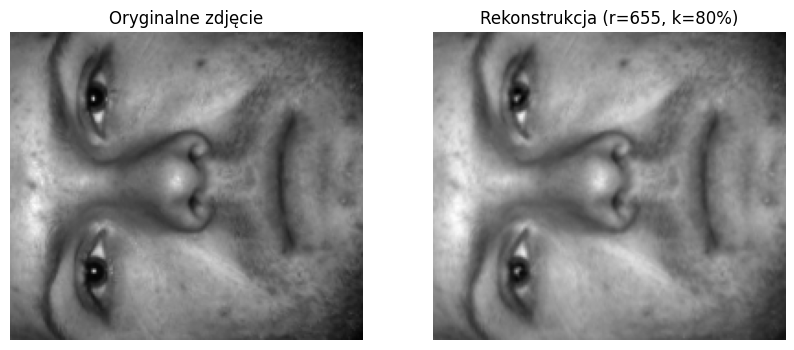

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import os


mat_contents = scipy.io.loadmat('allFaces.mat')
faces = mat_contents['faces']
m = int(mat_contents['m'].item())
n = int(mat_contents['n'].item())
nfaces = np.ndarray.flatten(mat_contents['nfaces'])

# 1. Obliczenie średniej i centrowanie danych
avgFace = np.mean(faces, axis=1).reshape(-1, 1)
X = faces - avgFace

# 2. Dekompozycja SVD
U, S, VT = np.linalg.svd(X, full_matrices=False)

# 3. Wyznaczenie liczby r dla k = 80%
k = 0.80
cumulative_energy = np.cumsum(S) / np.sum(S)
r = np.where(cumulative_energy >= k)[0][0] + 1

print(f"Liczba potrzebnych eigenfaces (r) dla k={k*100}%: {r}")

# Rekonstrukcja wybranego zdjęcia (np. pierwszego)
test_idx = 0
original_face = faces[:, test_idx]
testFaceMS = original_face - avgFace.flatten()

# Rekonstrukcja: Średnia + Projekcja na r składowych
reconFace = avgFace.flatten() + U[:, :r] @ (U[:, :r].T @ testFaceMS)

# 6. Wizualizacja
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(original_face.reshape(m, n), cmap='gray')
plt.title("Oryginalne zdjęcie")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(reconFace.reshape(m, n), cmap='gray')
plt.title(f"Rekonstrukcja (r={r}, k={int(k*100)}%)")
plt.axis('off')

plt.show()